In [1]:
from LNN import *

# matplotlib settings
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc
plt.style.use('fivethirtyeight')
rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
rc('text', usetex = True)

# Mutual Info, Linear Stage

In [18]:
ns1 = np.arange(500)
ns2 = np.arange(2, 500, 2)
ns3 = np.arange(3, 500, 3)
ns4 = np.arange(4, 500, 4)

muts1 = np.zeros(ns1.shape)
muts2 = np.zeros(ns2.shape)
muts3 = np.zeros(ns3.shape)
muts4 = np.zeros(ns4.shape)

fish1 = np.zeros(ns1.shape)
fish2 = np.zeros(ns2.shape)
fish3 = np.zeros(ns3.shape)
fish4 = np.zeros(ns4.shape)

fish_nl_1 = np.zeros(ns1.shape)
fish_nl_2 = np.zeros(ns2.shape)
fish_nl_3 = np.zeros(ns3.shape)
fish_nl_4 = np.zeros(ns4.shape)

In [23]:
for idx, n in enumerate(ns1):
    lnn = LNN(v = np.ones(n), w = np.ones(n))
    muts1[idx] = lnn.MI_linear_stage()
    fish1[idx] = lnn.FI_linear_stage()
    fish_nl_1[idx] = lnn.FI_squared_nonlin(2)
    
for idx, n in enumerate(ns2):
    v = np.ones(n)
    w = LNN.struct_weight_maker(n, 2)
    lnn = LNN(v = v, w = w)
    muts2[idx] = lnn.MI_linear_stage()
    fish2[idx] = lnn.FI_linear_stage()
    fish_nl_2[idx] = lnn.FI_squared_nonlin(2)

for idx, n in enumerate(ns3):
    v = np.ones(n)
    w = LNN.struct_weight_maker(n, 3)
    lnn = LNN(v = v, w = w)
    muts3[idx] = lnn.MI_linear_stage()
    fish3[idx] = lnn.FI_linear_stage()
    fish_nl_3[idx] = lnn.FI_squared_nonlin(2)

for idx, n in enumerate(ns4):
    v = np.ones(n)
    w = LNN.struct_weight_maker(n, 4)
    lnn = LNN(v = v, w = w)
    muts4[idx] = lnn.MI_linear_stage()
    fish4[idx] = lnn.FI_linear_stage()
    fish_nl_4[idx] = lnn.FI_squared_nonlin(2)

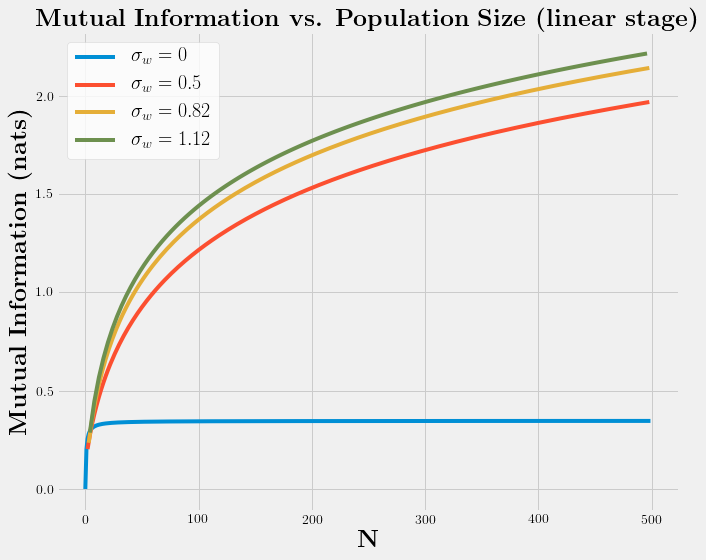

In [74]:
plt.figure(figsize = (10,8))
#plt.plot(ns0, fish_nl_0, label = 'zero')
plt.plot(ns1, muts1, label = r'$\sigma_w = 0$')
plt.plot(ns2, muts2, label = r'$\sigma_w = 0.5$')
plt.plot(ns3, muts3, label = r'$\sigma_w = 0.82$')
plt.plot(ns4, muts4, label = r'$\sigma_w = 1.12$')
#plt.plot(nsN, fish_nl_N, label = r'$N$s')
lgd = plt.legend(loc = 2, prop = {'size' : 20})
lgd.get_frame().set_facecolor('white')
plt.title(r'\textbf{Mutual Information vs. Population Size (linear stage)}', fontsize = 25)
plt.xlabel(r'$\mathbf{N}$', fontsize = 25)
plt.ylabel(r'\textbf{Mutual Information (nats)}', fontsize = 25)
plt.tight_layout()
plt.savefig('mutual_linear_stage.pdf')

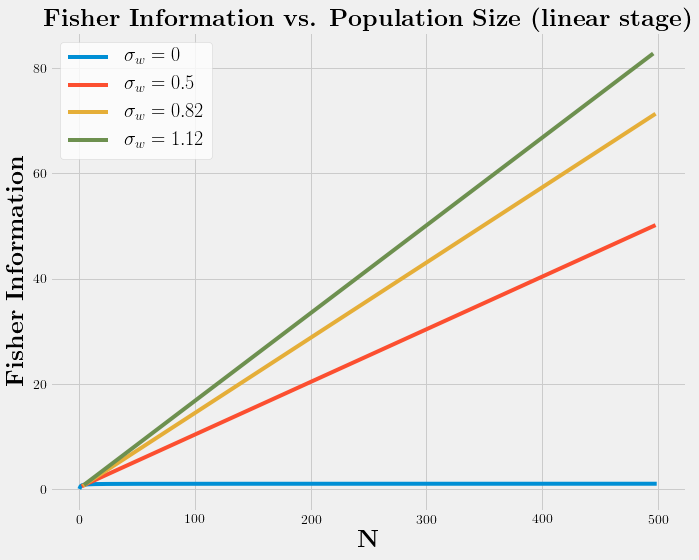

In [75]:
plt.figure(figsize = (10,8))
#plt.plot(ns0, fish_nl_0, label = 'zero')
plt.plot(ns1, fish1, label = r'$\sigma_w = 0$')
plt.plot(ns2, fish2, label = r'$\sigma_w = 0.5$')
plt.plot(ns3, fish3, label = r'$\sigma_w = 0.82$')
plt.plot(ns4, fish4, label = r'$\sigma_w = 1.12$')
lgd = plt.legend(loc = 2, prop = {'size' : 20})
lgd.get_frame().set_facecolor('white')
plt.title(r'\textbf{Fisher Information vs. Population Size (linear stage)}', fontsize = 25)
plt.xlabel(r'$\mathbf{N}$', fontsize = 25)
plt.ylabel(r'\textbf{Fisher Information}', fontsize = 25)
plt.tight_layout()
plt.savefig('fisher_linear_stage.pdf')

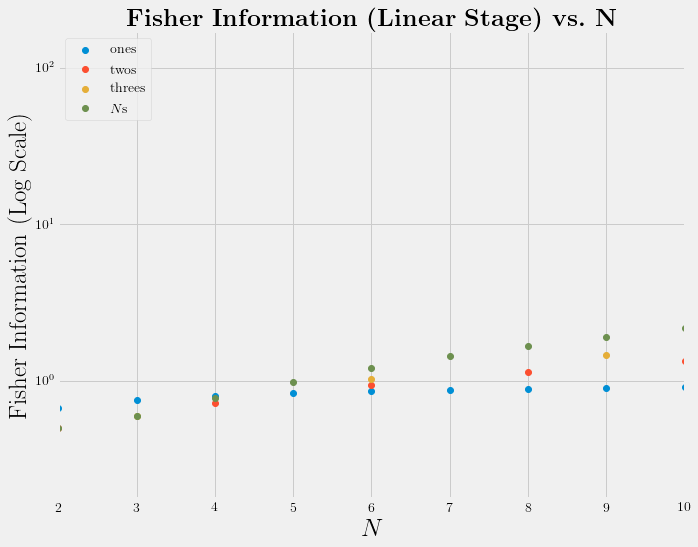

In [42]:
plt.figure(figsize = (10,8))
#plt.plot(ns0, fish0, label = 'zero')
plt.scatter(ns1, fish1, label = 'ones', linewidth = 1)
plt.scatter(ns2, fish2, label = 'twos', linewidth = 1)
plt.scatter(ns3, fish3, label = 'threes', linewidth = 1)
plt.scatter(nsN, fishN, label = r'$N$s', linewidth = 1)
plt.legend(loc = 2)
plt.title(r'\textbf{Fisher Information vs. Population Size', fontsize = 25)
plt.xlabel(r'$N$', fontsize = 25)
plt.ylabel('Fisher Information (Log Scale)', fontsize = 25)
plt.xlim([2,10])
plt.yscale('log')
#plt.savefig('fisher_linear_stage.pdf')

# Unstructured Weights

In [54]:
def unstruct_weight_plot(Ns, scales, repetitions, plot, design = 'lognormal',
                         v = None, sigmaG = 1., sigmaS = 1., sigmaI = 1., nonlinearity = 'squared', s = 1.):
    # create plot
    fig = plt.figure(figsize = (10, 8))
    ax = fig.add_subplot(111)
    # create data arrays
    data = np.zeros((len(Ns), len(scales), repetitions))
    # iterate over scales
    for N_idx, N in enumerate(Ns):
        for scale_idx, scale in enumerate(scales):
        # iterate over repetitions
            for rep in range(repetitions):
                w = 1 + LNN.unstruct_weight_maker(N, design, loc = 0, scale = scale)
                lnn = LNN(v = v, w = w, N = N, nonlinearity = nonlinearity,
                         sigmaG = sigmaG, sigmaS = sigmaS, sigmaI = sigmaI)
                if plot == 'FI_linear':
                    data[N_idx, scale_idx, rep] = lnn.FI_linear_stage()
                elif plot == 'MI_linear':
                    data[N_idx, scale_idx, rep] = lnn.MI_linear_stage()
                elif plot == 'FI_nonlinear':
                    data[N_idx, scale_idx, rep] = lnn.FI_nonlinear_stage(s)
        data_means = np.mean(data[N_idx, :, :], axis = 1)
        data_stdevs = np.std(data[N_idx, :, :], axis = 1)
        ax.plot(scales, data_means, color = 'k')
        ax.fill_between(scales, data_means - data_stdevs, data_means + data_stdevs,label = r'$N = %s$' %N)
    ax.set_xlabel(r'$\sigma_w$', fontsize = 30)
    ax.legend(loc = 4, facecolor = 'white')
    return fig, ax

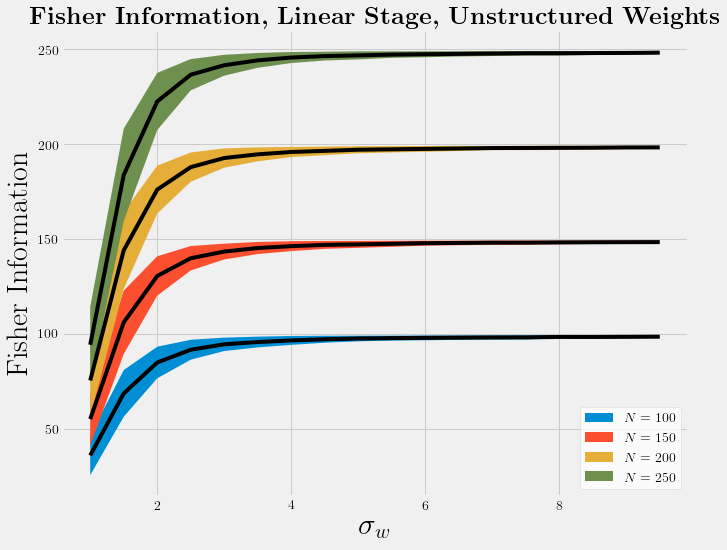

In [52]:
fig, ax = unstruct_weight_plot(Ns = [100, 150, 200, 250], scales = np.arange(1., 10, 0.5), plot = 'FI_linear', repetitions = 1000)
ax.set_ylabel(r'Fisher Information', fontsize = 30)
ax.set_title(r'\textbf{Fisher Information, Linear Stage, Unstructured Weights}', fontsize = 25)
plt.show()

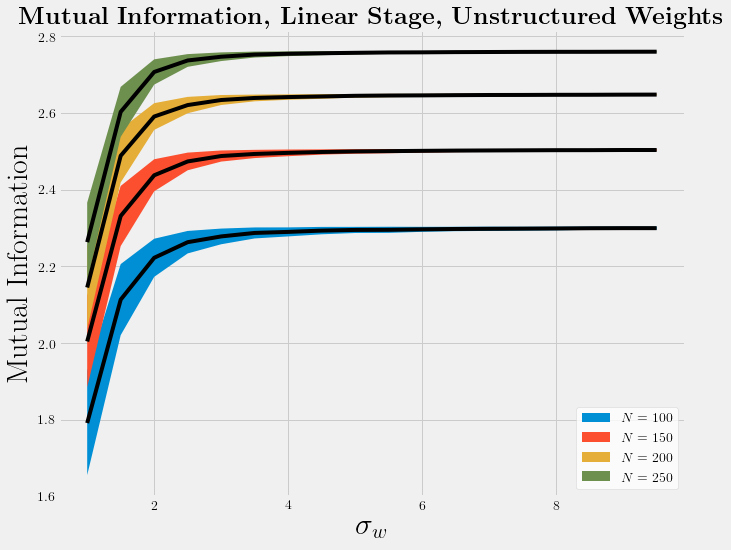

In [55]:
fig, ax = unstruct_weight_plot(Ns = [100, 150, 200, 250], scales = np.arange(1., 10, 0.5), plot = 'MI_linear', repetitions = 1000)
ax.set_ylabel(r'Mutual Information', fontsize = 30)
ax.set_title(r'\textbf{Mutual Information, Linear Stage, Unstructured Weights}', fontsize = 25)
plt.show()

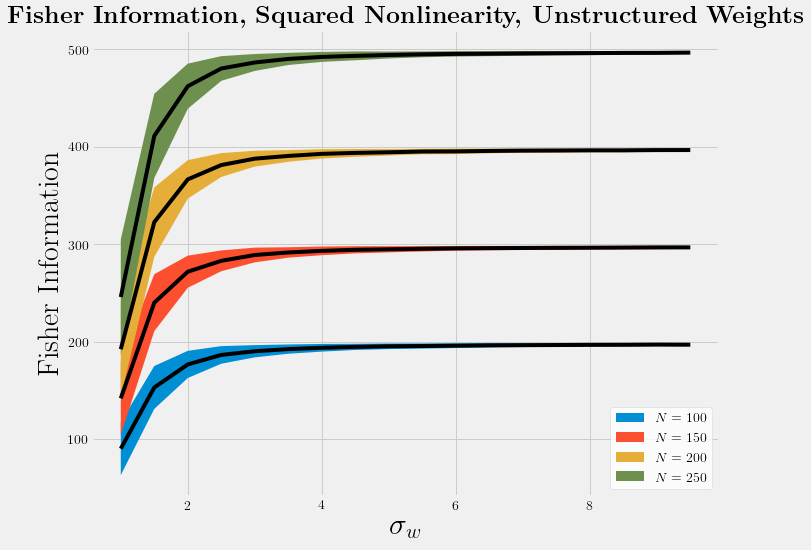

In [57]:
fig, ax = unstruct_weight_plot(Ns = [100, 150, 200, 250], scales = np.arange(1., 10, 0.5), plot = 'FI_nonlinear', repetitions = 1000)
ax.set_ylabel(r'Fisher Information', fontsize = 30)
ax.set_title(r'\textbf{Fisher Information, Squared Nonlinearity, Unstructured Weights}', fontsize = 25)
plt.show()